In [1]:
import string;
from gensim.models import doc2vec
import numpy as np
import nltk

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Random state.
RS = 30145621

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

In [473]:
docs = []
titles = []
locations = []
lines = ''
title = ''
location = ''

In [474]:
with open('unique.txt', 'r') as rf:
    for line in rf:
        if location == '':
            location = line[:-1]
            locations.append(location)
        if title == '':
            title = line[:-1]
            titles.append(title)
            location = ''
        if line == 'zzz\n':
            docs.append(lines)
            lines = ''
            title = ''
            location = ''
        else:
            lines = lines+line 

In [475]:
d, indices, counts = np.unique(docs, return_index=True, return_counts=True)
print(len(d))
print(len(titles))

9915
10439


In [476]:
"""write out unique jobs to new file"""
with open('unique.txt', 'w') as wf:
    for i in indices:
        wf.write(docs[i])
        wf.write('zzz\n')

In [477]:
def tokenize_jobs(documents):
    """converts job listings to genism tagged documents"""
    tokens = {}
    for i in range(0, len(documents)-1):
        tokenized = [x.lower() for x in nltk.word_tokenize(documents[i], language='english')]
        tokens[titles[i]] = tokenized 
    return tokens
    

tokens = tokenize_jobs(d)

In [478]:
def create_tagged_objects(tokens):
    """Convers tokens to genism tagged documents"""
    tagged_docs = {}
    for num, title in enumerate(tokens):
        tagged_doc = doc2vec.TaggedDocument(words=tokens[title], tags=[title])
        tagged_docs[title]= tagged_doc
    return tagged_docs


tagged_docs_dict = create_tagged_objects(tokens)    

In [479]:
import random

tagged_docs = [tagged_docs_dict[key] for key in list(tagged_docs_dict.keys())]

model = doc2vec.Doc2Vec(alpha=0.05, min_alpha=0.05, vector_size=100, window=8, min_count=5, workers=4)


print('Building vocab')
model.build_vocab(tagged_docs)
print('Vocab length: ' + str(len(model.wv.vocab)))

len(model.docvecs)
epochs = 20
factor = 0.8
for epoch in range(epochs):
    # train epoch by epoch
    print('Training epoch %d' % epoch)
    random.shuffle(tagged_docs)
    model.train(tagged_docs, total_examples=model.corpus_count, epochs=model.epochs)
    model.alpha *= factor  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay

Building vocab
Vocab length: 15911
Training epoch 0
Training epoch 1
Training epoch 2
Training epoch 3
Training epoch 4
Training epoch 5
Training epoch 6
Training epoch 7
Training epoch 8
Training epoch 9
Training epoch 10
Training epoch 11
Training epoch 12
Training epoch 13
Training epoch 14
Training epoch 15
Training epoch 16
Training epoch 17
Training epoch 18
Training epoch 19


In [480]:
model.wv.most_similar('python')

[('powershell', 0.5184433460235596),
 ('javascript', 0.5023186802864075),
 ('stata', 0.46773117780685425),
 ('angular', 0.4615904688835144),
 ('c++', 0.4541410207748413),
 ('autocad', 0.4503403604030609),
 ('trim', 0.43185436725616455),
 ('xml', 0.42961668968200684),
 ('arcgis', 0.42694395780563354),
 ('vb', 0.4211209714412689)]

In [481]:
model.wv.most_similar('software')

[('pc', 0.45437324047088623),
 ('technologies', 0.4447222948074341),
 ('3-d', 0.4172952175140381),
 ('equipment', 0.4167215824127197),
 ('tools', 0.4080018401145935),
 ('computers', 0.4053024649620056),
 ('computer', 0.39837825298309326),
 ('windows-based', 0.39160245656967163),
 ('firmware', 0.3889652192592621),
 ('se', 0.38238364458084106)]

In [482]:
model.wv.most_similar('journalism')

[('anthropology', 0.49755173921585083),
 ('economics', 0.4877868890762329),
 ('science', 0.4750896692276001),
 ('linguistics', 0.4743393659591675),
 ('farsi', 0.46157047152519226),
 ('demography', 0.45504239201545715),
 ('mathematics', 0.4338679909706116),
 ('sociology', 0.41659125685691833),
 ('criminology', 0.38723695278167725),
 ('biology', 0.38574934005737305)]

In [483]:
model.wv.most_similar('medical')

[('health', 0.45965301990509033),
 ('pediatric', 0.4590153396129608),
 ('chiropractic', 0.4479690492153168),
 ('nonesuch', 0.40508291125297546),
 ('surgery', 0.39205968379974365),
 ('autism', 0.3886915445327759),
 ('call', 0.3870578110218048),
 ('radiology', 0.37272909283638),
 ('healthcare', 0.3602098822593689),
 ('ecw', 0.35786837339401245)]

In [484]:
vectors = []
for i in range(len(model.docvecs)-1):
    vectors.append(model.docvecs[i])

In [485]:
docs_proj = TSNE(random_state=RS).fit_transform(vectors)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x12d64dc50>)

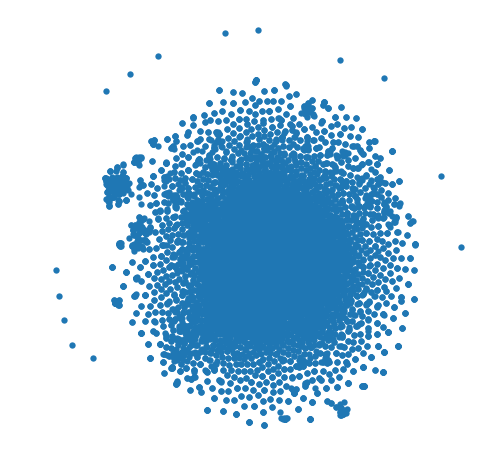

In [486]:
def scatter(x):
    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    
    return f, ax, sc

scatter(docs_proj)